# Checkpoint 1 
## (Do not remove any comments that start with"# @@@".) 

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [95]:
df = pd.read_csv('../data/states_edu.csv')
print(df.head())
print(f"Dataset Size: {df.shape}")
print(f"Columns: {df.columns}")

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [100]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                   0
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

<Axes: title={'center': 'Distribution of 4th Grade Math Scores'}, ylabel='Frequency'>

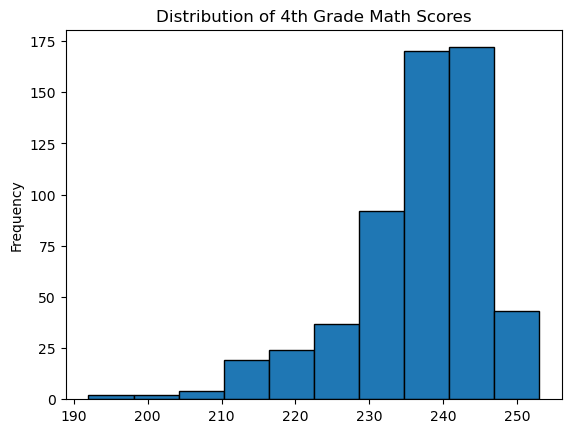

In [97]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")

In [98]:
df["AVG_MATH_4_SCORE"] = (
    df.groupby("STATE")["AVG_MATH_4_SCORE"]
      .transform(lambda x: x.fillna(x.mean()))
)

<Axes: title={'center': 'Distribution of 4th Grade Math Scores'}, ylabel='Frequency'>

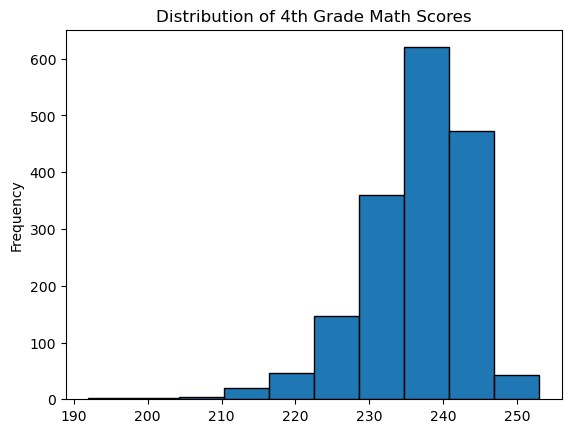

In [99]:
df.AVG_MATH_4_SCORE.plot.hist(title="Distribution of 4th Grade Math Scores", edgecolor="black")

I saw that the dataset had missing values in the AVG_MATH_4_SCORE column. To impute these, I used the mean score within each state rather than the overall mean, since performance differ across states. After imputation, the distribution became more concentrated while still showing a slight right skew, reflecting that most scores cluster in the mid-to-high range with fewer low-performing outliers. Overall, this made the dataset more complete while maintaining its underlying shape.

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [103]:
# @@@ 1
# Your Code
# 33 years
print(df['YEAR'].unique())
print(f"There are {df['YEAR'].nunique()} years of data.")

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 1986 1987 1988
 1989 1990 1991 2017 2019]
There are 33 years of data.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [104]:
# @@@ 2
michigan_avg = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean()
ohio_avg = df[df['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean()
print(f"Michigan Grade 4 average math score: {michigan_avg}")
print(f"Ohio Grade 4 average math score: {ohio_avg}")

# Ohio has the higher grade 4 average math score

Michigan Grade 4 average math score: 234.36363636363637
Ohio Grade 4 average math score: 239.4545454545455


Find the average for your chosen test across all states in 2019

In [106]:
# @@@ 3
states_avg = df[df['YEAR'] == 2019]['AVG_MATH_4_SCORE'].mean()
print(f"Average grade 4 math score accross all states in 2019: {states_avg}")

Average grade 4 math score accross all states in 2019: 239.9433962264151


For each state, find a maximum value for your chosen test score

In [107]:
# @@@ 4
states_max = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()
print(states_max)

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [108]:
# @@@ 5
# Remember what the original features are 
print(df.columns)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


In [109]:
# Instruction expenditure per student
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']

# Support services expenditure per student
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL']

# Previous years instruction expenditure per student
df = df.sort_values(by=["STATE", "YEAR"])
df["PREV_YEAR_INSTRUCTION_EXPENDITURE"] = df.groupby("STATE")["INSTRUCTION_EXPENDITURE"].shift(1)
df['INSTRUCTION_EXPENDITURE_PER_STUDENT_LAG1'] = df['PREV_YEAR_INSTRUCTION_EXPENDITURE'] / df['ENROLL']

# Previous years grade 4 average math score
df["PREV_YEAR_AVG_MATH_4_SCORE"] = df.groupby("STATE")["AVG_MATH_4_SCORE"].shift(1)

In [110]:
df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,INSTRUCTION_EXPENDITURE_PER_STUDENT,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT,PREV_YEAR_INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE_PER_STUDENT_LAG1,PREV_YEAR_AVG_MATH_4_SCORE
1275,1986_ALABAMA,ALABAMA,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,733735.0,226.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1276,1987_ALABAMA,ALABAMA,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,729234.0,226.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.090909
1277,1988_ALABAMA,ALABAMA,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,724751.0,226.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.090909
1278,1989_ALABAMA,ALABAMA,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,723743.0,226.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.090909
1279,1990_ALABAMA,ALABAMA,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,721806.0,226.090909,253.0,NaN,NaN,NaN,NaN,NaN,NaN,226.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2014_WYOMING,WYOMING,2014,92732.0,1772633.0,112709.0,965213.0,694711.0,1775999.0,865932.0,...,94067.0,241.454545,NaN,NaN,NaN,9.338006,5.993195,846872.0,9.132468,247.000000
1223,2015_WYOMING,WYOMING,2015,93867.0,1962874.0,120290.0,1116917.0,725667.0,1942406.0,895910.0,...,94717.0,247.000000,287.0,228.0,269.0,9.544462,6.024364,865932.0,9.225095,241.454545
1274,2016_WYOMING,WYOMING,2016,94511.0,2044669.0,123012.0,1175899.0,745758.0,2034229.0,921494.0,...,94170.0,241.454545,NaN,NaN,NaN,9.750124,6.197162,895910.0,9.479426,247.000000
1631,2017_WYOMING,WYOMING,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94258.0,248.000000,289.0,227.0,269.0,NaN,NaN,921494.0,NaN,241.454545


Feature engineering justification: **I believe that the amount a state spends on its services (instruction and support) will have an effect on the students academic performance, so I chose to create a new feature that represents the spend on services per student in that state. Also, I lagged the previous years instruction expenditure because I believe that the amount a state spent the previous year will effect the current year. Finally, I lagged the previous years grade 4 average math score because I believe knowing what the students past academic performance could help predict the current students performance.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

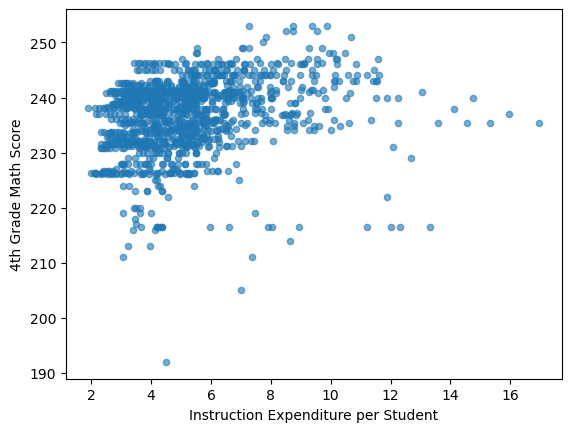

In [114]:
# @@@ 6
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure per Student')
plt.ylabel('4th Grade Math Score')

**This scatterplot shows the relationship between instruction expenditure per student and average 4th grade math scores. While higher spending generally corresponds to slightly higher scores, the relationship appears weak with considerable variability across states.**

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

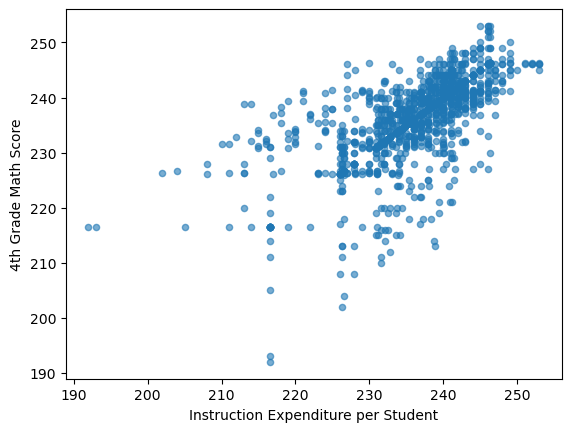

In [115]:
# @@@ 7
df.plot.scatter(x='PREV_YEAR_AVG_MATH_4_SCORE', y='AVG_MATH_4_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure per Student')
plt.ylabel('4th Grade Math Score')

**This scatterplot compares each state’s previous year 4th grade math scores with its current year scores. The strong upward trend shows that states with higher scores in one year tend to maintain higher scores in the following year, suggesting consistency in academic performance over time.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# @@@ 8

features = ['INSTRUCTION_EXPENDITURE_PER_STUDENT', 'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',
            'INSTRUCTION_EXPENDITURE_PER_STUDENT_LAG1', 'PREV_YEAR_AVG_MATH_4_SCORE',
            'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE']

X = df[features]
y = df.loc[X.index]['AVG_MATH_4_SCORE'] 
y.fillna(y.median(), inplace=True)

In [121]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [122]:
# @@@ 10
# import your sklearn class here
from sklearn.ensemble import RandomForestRegressor

In [123]:
# @@@ 11
# create your model here
model = RandomForestRegressor(
    n_estimators=300,      # number of trees
    max_depth=None,  
    min_samples_leaf=2,    # light regularization to reduce overfitting
    random_state=42, 
)

In [124]:
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=300, random_state=42)

In [125]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [129]:
# @@@ 12
from sklearn.metrics import r2_score, root_mean_squared_error

r2  = r2_score(y_test, y_pred)  # shows how much of the variation in test scores the model explains
rmse = root_mean_squared_error(y_test, y_pred) # tells us the typical size of the prediction error

print(f"R^2:  {r2}")
print(f"RMSE: {rmse}")

R^2:  0.7207932543533175
RMSE: 3.5997059795488124


The Random Forest model achieved an R2-score of about 0.72, meaning it explains roughly 72% of the variation in fourth grade math scores across states and years. This indicates a fairly strong relationship between the predictors and the target variable. The RMSE of about 3.6 suggests that, on average, the model’s predictions are off by around 3–4 points on the math score scale. Overall, the model captures most of the underlying trends, but there is still room for improvement.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

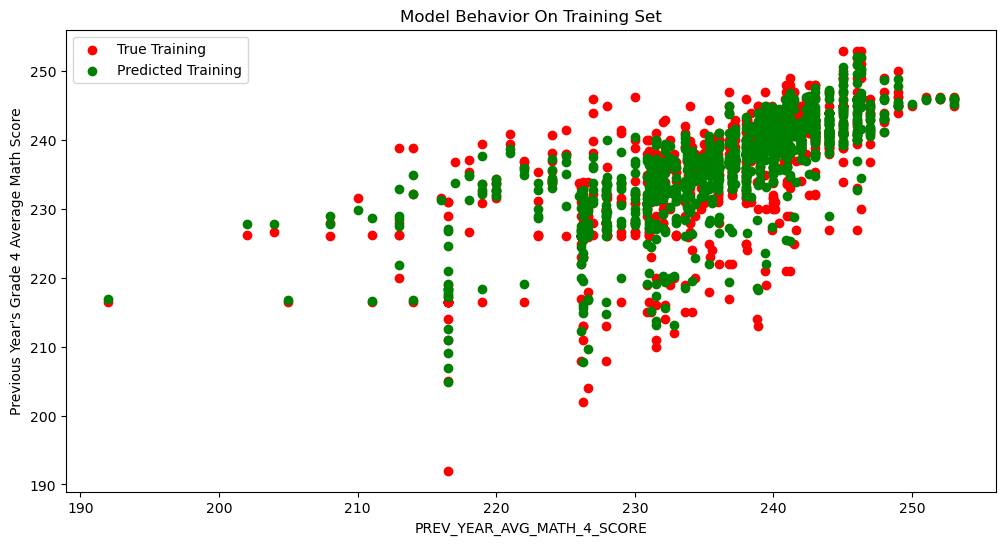

In [133]:
# @@@ 13

col_name = 'PREV_YEAR_AVG_MATH_4_SCORE'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel("Previous Year's Grade 4 Average Math Score")
plt.title("Model Behavior On Training Set")

This plot shows that the model closely follows the upward relationship between a state’s previous year and current year 4th grade math scores. The overlap of predicted and true values suggests that past scores are a strong predictor of current performance on the training set.

Text(0.5, 1.0, 'Model Behavior on Testing Set')

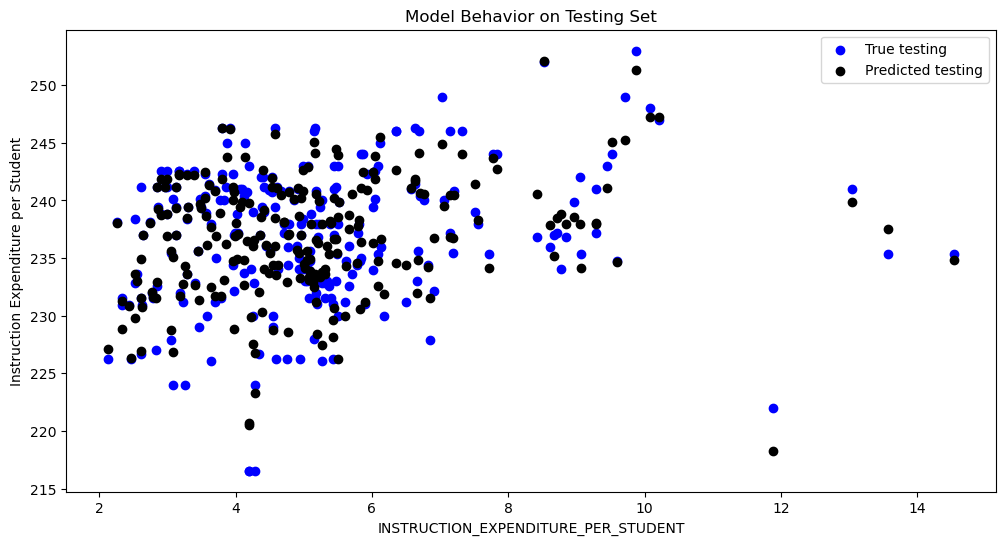

In [135]:
# @@@ 14


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Instruction Expenditure per Student')
plt.title("Model Behavior on Testing Set")

This plot shows how well the model predicts test scores based on instruction expenditure per student in the testing set. The overlap between true values and predictions indicates the model captures some of the overall trend, but the wide scatter suggests that expenditure alone is not a strong predictor of math scores.